Libraries and Dependencies (**Must Run**)

In [ ]:
!pip install scipy
!pip install lime
!pip install shap

# from sklearn.model_selection import StratifiedKFold # unused
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from scipy import stats as sts
import pandas as pd
from scipy.stats.distributions import randint
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
import lime as lime
from lime.lime_tabular import LimeTabularExplainer
import shap as shap
import pickle
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=fded913f90273d48ed04d550cb261962fb9c71973177a30b5b10382ec6874ad1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.1 MB/s eta 0:00:00


Importing the datafile (**Must Run**)

In [ ]:
# Importing the datafile as df
df = pd.read_csv('bank-full.csv' ,sep=";")
df.head(2) #printing head with n rows

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y  
0    5   may       261         1     -1         0  unknown  no  
1    5   may       151         1     -1         0  unknown  no

##**2) Data Exploration & Descriptive Statistics**

In [ ]:
#printing the column names, 5 rows of the head and the distribution of the set
print("Columns:\n", df.columns) #printing the columns in the dataframe
print("\nFirst 5 Rows:\n", df.head()) #printing the head with n rows
print("\nShape of Data Set:\n", df.shape) #printing the shape of dataframe

Columns:
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

First 5 Rows:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may

3) **Descriptive Statistics**

In [ ]:
#printing descriptive statistics of the total dataset, the distribution of age and job
print("\nSummary:\n", df.describe()) #describe is the standard tool to show descriptive statistics of the dataframe
print("\nAge:\n", df["age"].value_counts())
print("\nJob:\n", df["job"].value_counts())


Summary:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000

4) **Visual Exploratory Data Analysis**

4.1) **Histogram & Boxplot: Age**

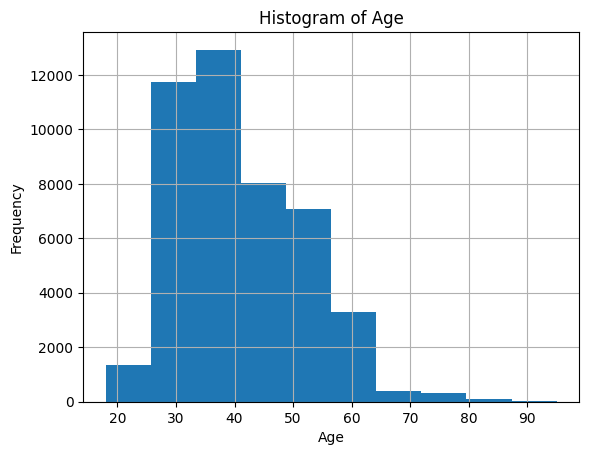

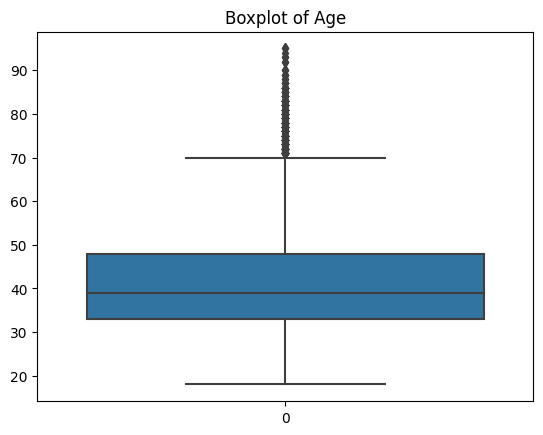

In [ ]:
# 4.1 Histogram & Boxplot: Age
df['age'].hist()
plt.title("Histogram of Age") # Title of histogram
plt.xlabel("Age") # X-axis label
plt.ylabel("Frequency") # Y-axis label
plt.show()

sns.boxplot(df['age']) # using seaborn to plot a boxplot
plt.title("Boxplot of Age") # Title of the boxplot
plt.show()

4.2) **Histogram: Educational Level**

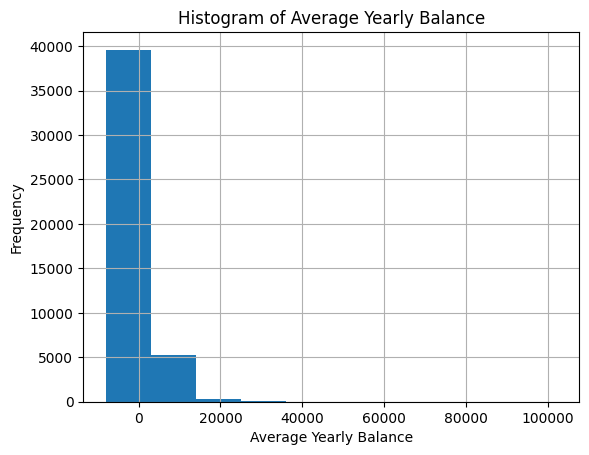

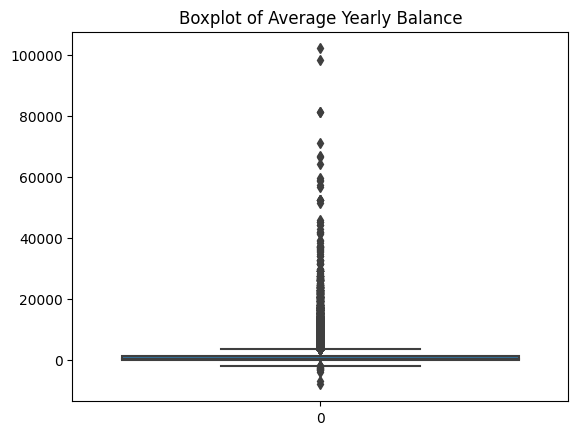

In [ ]:
#histogram of the yearly balance and boxplot of the histogram
df['balance'].hist() #Plotting a Histogram on the column Balance
plt.title("Histogram of Average Yearly Balance")
plt.xlabel("Average Yearly Balance")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(df['balance'])
plt.title("Boxplot of Average Yearly Balance")
plt.show()

5) **Correlation Analysis**

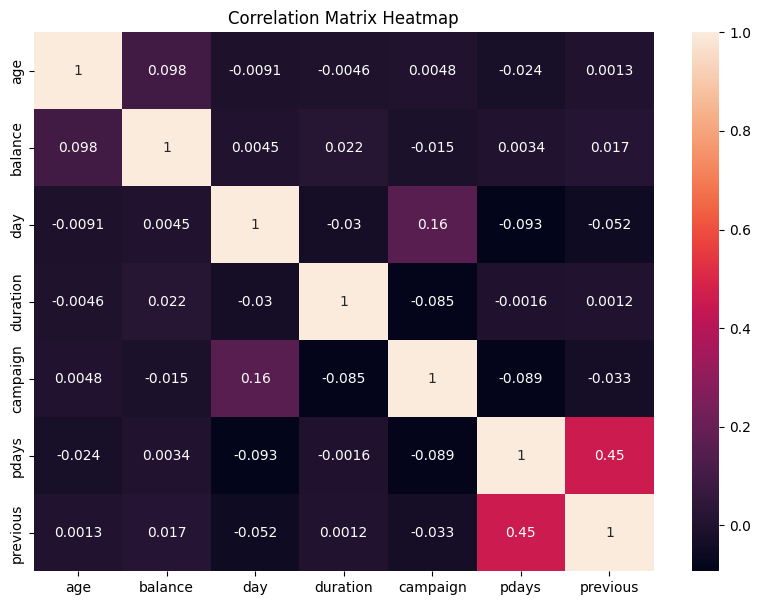

In [ ]:
#Correlation matrix to see existing correlations between categories
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize = (10,7))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

6) **Advanced Exploratory Data Analysis**

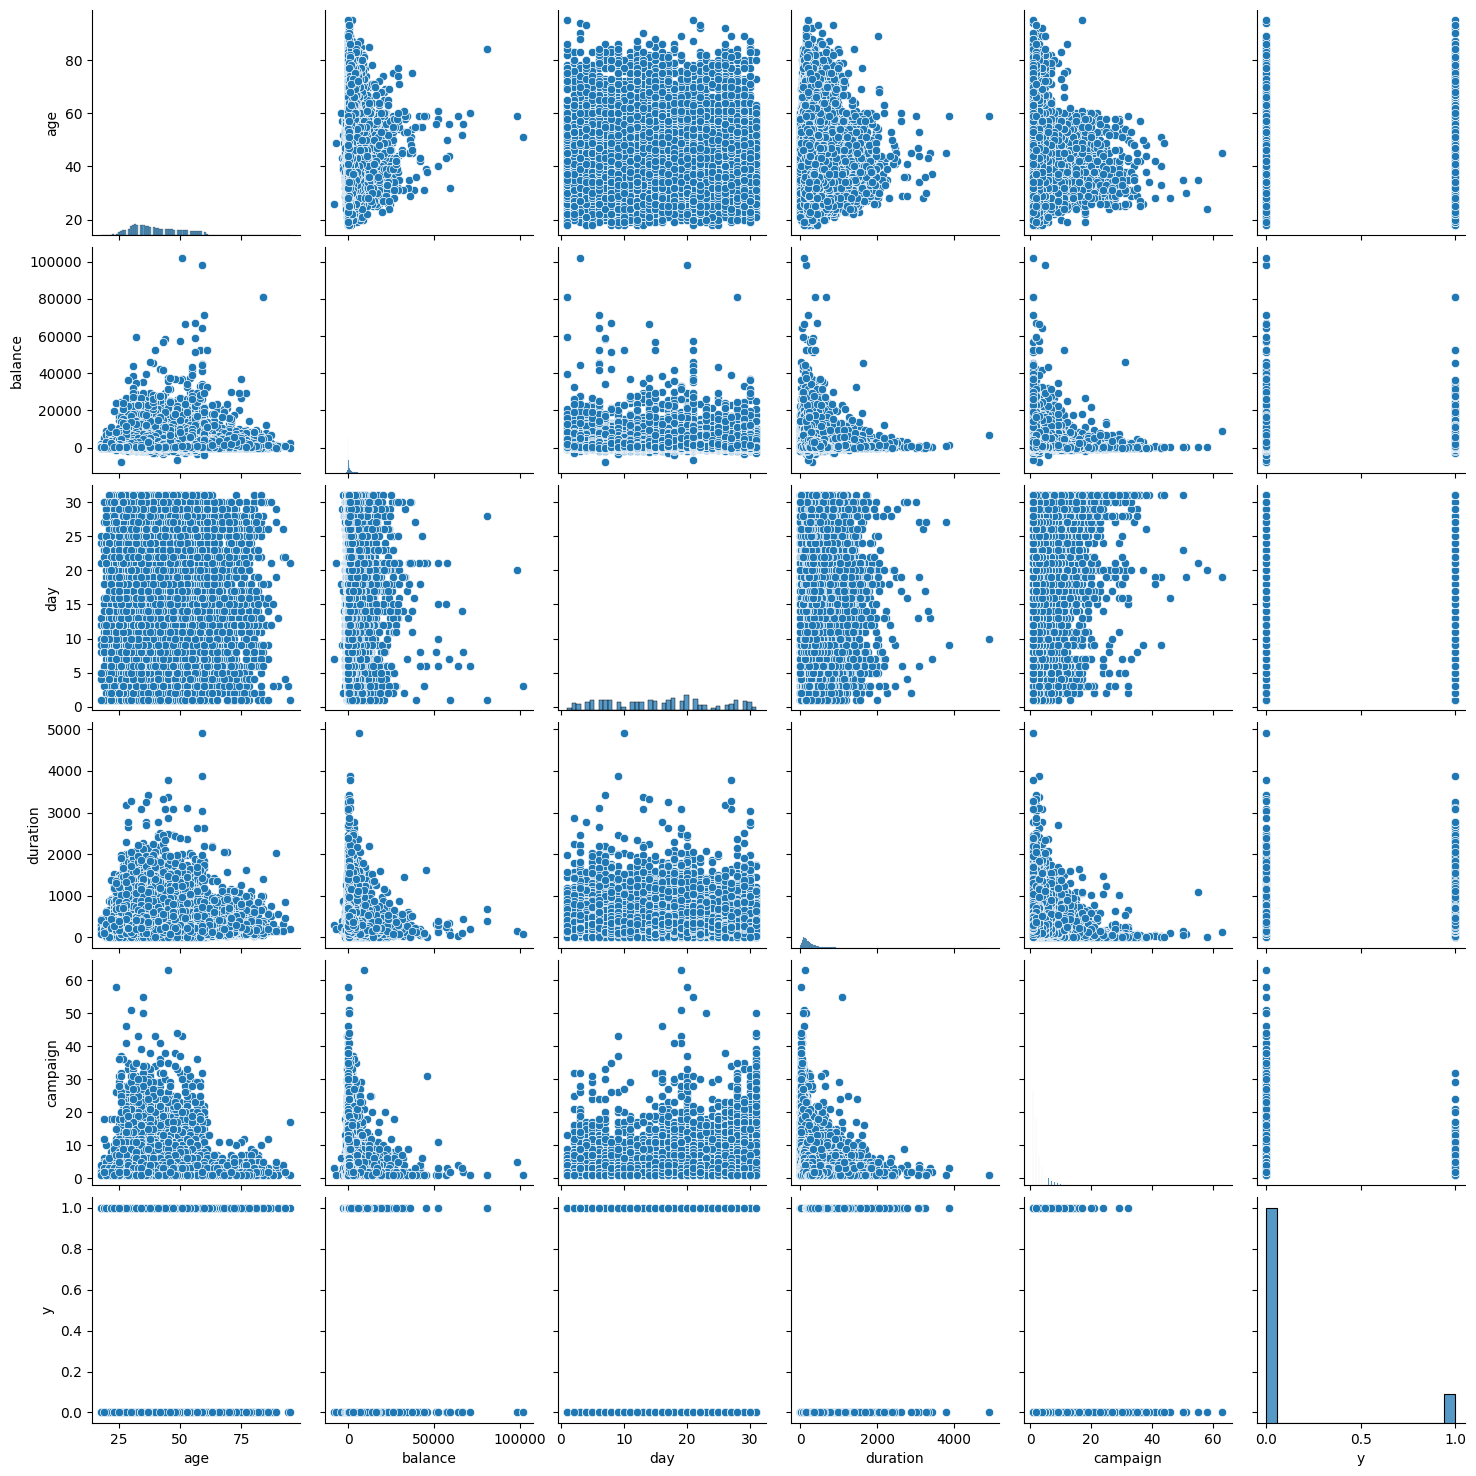

In [ ]:
#Here we plot a pairplot to see within-correlations in a plot
sns.pairplot(df[['age', 'balance', 'day', 'duration','campaign', 'y']])
plt.show()

##**One Hot Encoding** - **Mitigation**

One-Hot encoding in this instance will bin some larger variables, to reduce the computational needs. One-Hot encoding _before_ train/test-split will also ensure we do not contaminate the data.

In [ ]:
data = pd.read_csv('bank-full.csv', delimiter=';') #load the file again

#split the balance into binned version of the categories to reduce overfitting
data['balance_binned'] = pd.cut(data['balance'], bins=[-np.inf, 0, 1000, np.inf], labels=['Low', 'Medium', 'High'])
data['age_binned'] = pd.cut(data['age'], bins =[18, 25, 35 ,55, 120], labels = ['18,25', '25,35', '35,55', '55+'])
#drop data categories that are irrelevant for model training
#
#here we drop balance and age so they can be properly replaced by the binned versions
data.drop('balance', axis=1, inplace=True)
data.drop('age', axis = 1, inplace = True)

#We are looking for socioeconomic variables. Everything else can be deleted
data.drop('contact', axis =1, inplace=True)
data.drop('day', axis =1, inplace=True)
data.drop('month', axis =1, inplace = True)
data.drop('pdays', axis = 1, inplace = True)
data.drop('campaign', axis =1, inplace = True)
data.drop('default', axis = 1, inplace = True)
data.drop('previous', axis = 1, inplace = True)
data.drop('poutcome', axis = 1, inplace = True)

#Reason to drop duration is the assumption that a longer call meant that the person subscribed,
#so future calls cannot be based on this
data.drop('duration', axis = 1, inplace = True)



#pd.get_dummies encodes all socio-economic categories
data_encoded = pd.get_dummies(data, columns=[
    'marital', 'education','housing', 'loan', 'balance_binned', 'job','y', 'age_binned'])

#show head of data to check values and encoding
data_encoded.head(5)


marital_divorced  marital_married  marital_single  education_primary  \
0                 0                1               0                  0   
1                 0                0               1                  0   
2                 0                1               0                  0   
3                 0                1               0                  0   
4                 0                0               1                  0   

   education_secondary  education_tertiary  education_unknown  housing_no  \
0                    0                   1                  0           0   
1                    1                   0                  0           0   
2                    1                   0                  0           0   
3                    0                   0                  1           0   
4                    0                   0                  1           1   

   housing_yes  loan_no  ...  job_student  job_technician  job_unemployed  \
0            1        1  ...            0               0               0   
1            1        1  ...            0               1               0   
2            1        0  ...            0               0               0   
3            1        1  ...            0               0               0   
4            0        1  ...            0               0               0   

   job_unknown  y_no  y_yes  age_binned_18,25  age_binned_25,35  \
0            0     1      0                 0                 0   
1            0     1      0                 0                 0   
2            0     1      0                 0                 1   
3            0     1      0                 0                 0   
4            1     1      0                 0                 1   

   age_binned_35,55  age_binned_55+  
0                 0               1  
1                 1               0  
2                 0               0  
3                 1               0  
4                 0               0  

[5 rows x 32 columns]

##**Training Models** (Logistic regression, HighGradientBoosterClassifier, K-Nearest-Neigbour, Random Forest

##**Logistic Regression**

Here we perform a simple logistic regression with a gridsearch based on the oversampled data to show us what parameters are best in accuracy and precision.

In [ ]:
# Split the data into features y_yes and y_no
X_1 = data_encoded.drop(["y_yes", "y_no"], axis=1)
y_1 = data_encoded["y_yes"]
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.20, random_state=0)

# Scale the data to balance the dataset - mitigation to reduce biases in unbalanced set
scaledsets = StandardScaler()
X_1_train_scaled = scaledsets.fit_transform(X_1_train)
X_1_test_scaled = scaledsets.transform(X_1_test)

# Define the parameter grid for hyperparameter tuning
parametric_grid = {
    'C': [0.001, 0.01, 0.05, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [None, 0.5]  # Only used if penalty is 'elasticnet'
}

# Use GridSearchCV to find the best parameters through multi-fold testing of parameter combinations
grid_search = GridSearchCV(LogisticRegression(max_iter=1999), parametric_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_1_train_scaled, y_1_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters found: ", grid_search.best_params_)

# train the logistic regression model with the best parameters
best_params = grid_search.best_params_
logistic_regression = LogisticRegression(**best_params, max_iter=1999)
logistic_regression.fit(X_1_train_scaled, y_1_train)

# Nake Prediction on test-set
y_1_pred = logistic_regression.predict(X_1_test_scaled)

# Calculating and printing accuracy
accuracy = accuracy_score(y_1_test, y_1_pred)
print(f'Logistic Regression accuracy with best parameters: {accuracy}')

Fitting 10 folds for each of 72 candidates, totalling 720 fits



120 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1863, i

Best Parameters found:  {'C': 0.001, 'class_weight': None, 'l1_ratio': None, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression accuracy with best parameters: 0.8824505142098861


#Evaluating Logistic Regression

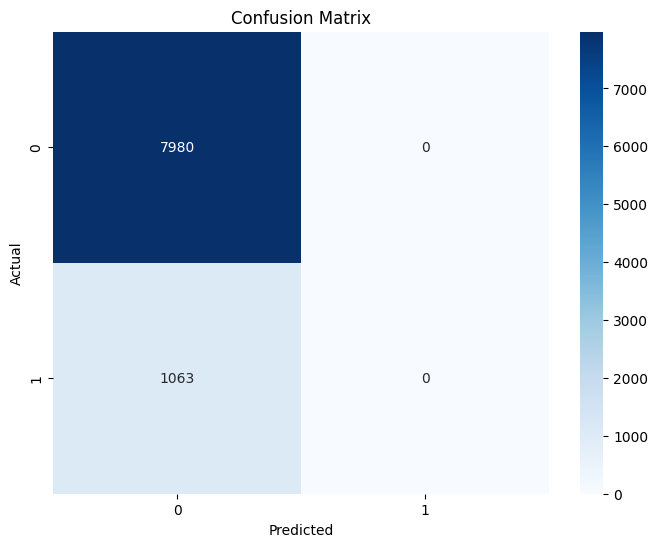

In [ ]:
from sklearn.metrics import f1_score
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
y_1_pred = logistic_regression.predict(X_1_test_scaled)

TP = 0
FP = 0
FN = 1063
TN = 7980


##**HistogramGradientBoosterClassifier**

The HGBC shows itself up in the ranks along with the Logistic Regression showing a 87.9% accuracy. Since 87.9 < 88.3, we will disregard the results of the HGBC

In [ ]:
X_2 = data_encoded.drop(['y_yes', 'y_no'], axis=1)
y_2 = data_encoded['y_yes']

# Split the data into training and testing sets
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Initialize and apply the StandardScaler
scaler = StandardScaler()
X_2_train_scaled = scaler.fit_transform(X_2_train)
X_2_test_scaled = scaler.transform(X_2_test)

# Defining Parameter Grid
param_grid = {
    'max_iter': [100, 300],
    'max_depth': [7, 10],
    'min_samples_leaf': [30, 40],
    'learning_rate': [ 0.001],
    'max_bins': [200],
    'l2_regularization': [0.1, 1,]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(HistGradientBoostingClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_2_train_scaled, y_2_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Create the HistGradientBoostingClassifier with the best parameters
best_HGBC = HistGradientBoostingClassifier(**grid_search.best_params_)

# Optionally, fit the model to the entire training set and evaluate on the test set
best_HGBC.fit(X_2_train_scaled, y_2_train)
test_score = best_HGBC.score(X_2_test_scaled, y_2_test)
print(f'Test Set Accuracy: {test_score}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.001, 'max_bins': 200, 'max_depth': 7, 'max_iter': 100, 'min_samples_leaf': 30}
Test Set Accuracy: 0.8793541966161672


#Evaluating HGBC

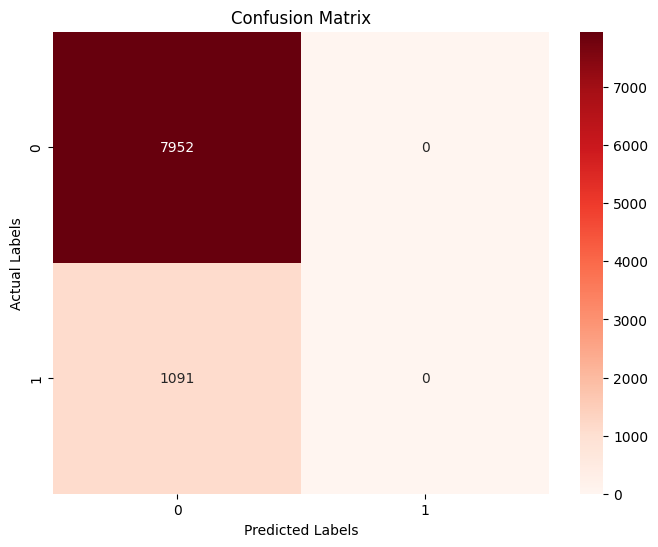

In [ ]:
y_2_pred = best_HGBC.predict(X_2_test_scaled)

cm = confusion_matrix(y_2_test, y_2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

##Random Forest + SMOTE


The Randomforest model showed a significant drop in accuracy (64.8%). Due to this drop we will disregard the results of this model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

X_4 = data_encoded.drop(['y_yes', 'y_no'], axis=1)
y_4 = data_encoded['y_yes']

# Here we split the dataset into a 80/20 distribution (20 being the training set)
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size=0.20, random_state=200)

# Here RandomOverSampler has been used to counter the class distribution
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_4_train_resampled, y_4_train_resampled = ros.fit_resample(X_4_train, y_4_train)

param_grid = {
    'n_estimators': [200, 300],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt'],
    'max_depth': [200]
}

# Performing grid search using the resampled data to find the best model
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_4_train_resampled, y_4_train_resampled)
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_rf_model.predict(X_4_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_4_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6482362047992922


#Evaluating Random Forest

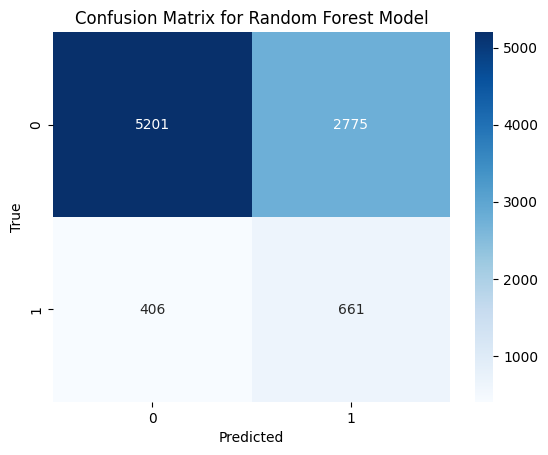

Precision: 0.19
Recall: 0.62
F1-Score: 0.29


In [ ]:
cm = confusion_matrix(y_4_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

TP = 657
FP = 2759
FN = 410
TN = 5217

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

##Decision Tree

Our decision tree also fails to show a decent accuracy and hits (64.0%) Due to this we will reject this model

In [ ]:

X_3 = data_encoded.drop(['y_yes', 'y_no'], axis=1)
y_3 = data_encoded['y_yes']

# Split the data into training and testing sets (80% train, 20% test)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.20, random_state=200)

# Initializing and applying standardScaler
scaler = StandardScaler()
X_3_train_scaled = scaler.fit_transform(X_3_train)
X_3_test_scaled = scaler.transform(X_3_test)

#Hyperparameters
decision_tree = DecisionTreeClassifier(
    random_state=1,
    max_depth=100,
    min_samples_split=10,
    min_samples_leaf=2,
    class_weight='balanced',
    criterion='gini',  # Usually 'gini' or 'entropy'
    splitter='best'
)

# Train the model on the scaled training data
decision_tree.fit(X_3_train_scaled, y_3_train)

# Make predictions on the scaled test data
y_3_pred = decision_tree.predict(X_3_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_3_test, y_3_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6408271591286078


#Evaluating Decision Tree

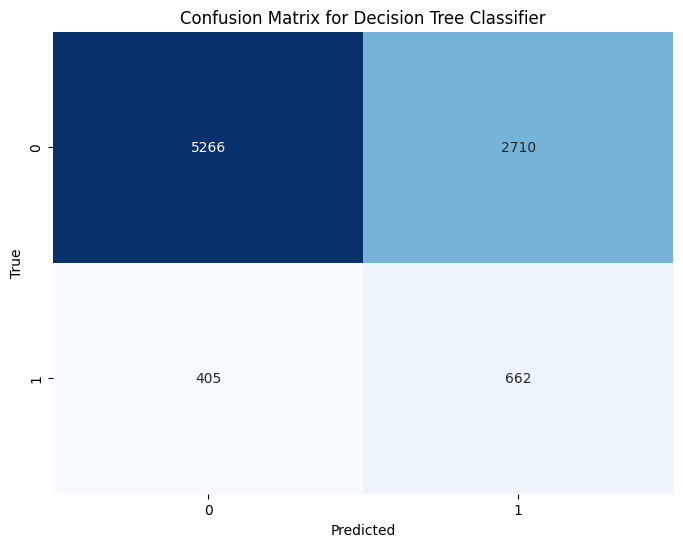

In [ ]:
cm = confusion_matrix(y_3_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

#Feature Analysis


In [ ]:
#Taking only the Logistic Regression coefficients
feature_importance = abs(logistic_regression.coef_[0])
important_features = pd.Series(feature_importance, index=X_1_train.columns).sort_values(ascending=False)

# Selecting the N categories we deem important
N = 10  #
top_features = important_features.head(N).index.tolist()
print("Top important features:", top_features)


Top important features: ['housing_no', 'housing_yes', 'marital_divorced', 'job_entrepreneur', 'age_binned_35,55', 'age_binned_25,35', 'age_binned_18,25', 'job_unknown', 'job_unemployed', 'job_technician']


##Lime Analysis of Logistic Regression

In [ ]:
import lime.lime_tabular

# Initialize the explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_1_train.values,
    feature_names=X_1_train.columns,
    class_names=["Not Subscribe", "Subscribe"],
    mode='classification'
)

# Select an instance to explain
i = 15
instance_to_explain = X_1_test.values[i]

# Explain the instance
exp = explainer.explain_instance(instance_to_explain, logistic_regression.predict_proba)

# Display the explanation
exp.show_in_notebook(show_table=True)


##Lime Analysis of HGBC

> Indented block



In [ ]:
i = 0  # Index of the test instance to explain
instance_to_explain = X_2_test_scaled[i]

# Explain the prediction on the instance
exp = explainer.explain_instance(
    instance_to_explain,
    best_HGBC.predict_proba,
    num_features=5  # Adjust the number of features as needed
)

# Display the explanation in a Jupyter Notebook
exp.show_in_notebook(show_table=True)

##SHAP Analysis of Logistic Regression

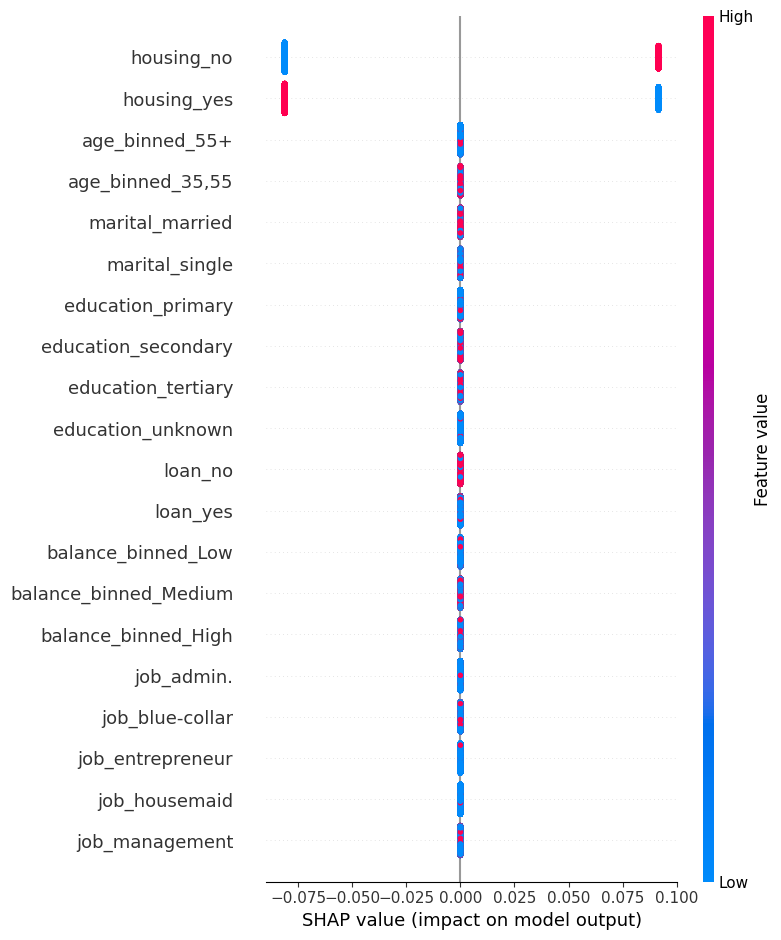

In [ ]:
import shap
explainer = shap.Explainer(logistic_regression, X_1_train_scaled)
shap_values = explainer(X_1_test_scaled)
shap.summary_plot(shap_values, X_1_test_scaled, feature_names=X_1_train.columns)
